In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2023-2024 School Year/Machine Learning /EOS Chem/protomers.csv')

#Data Exploration

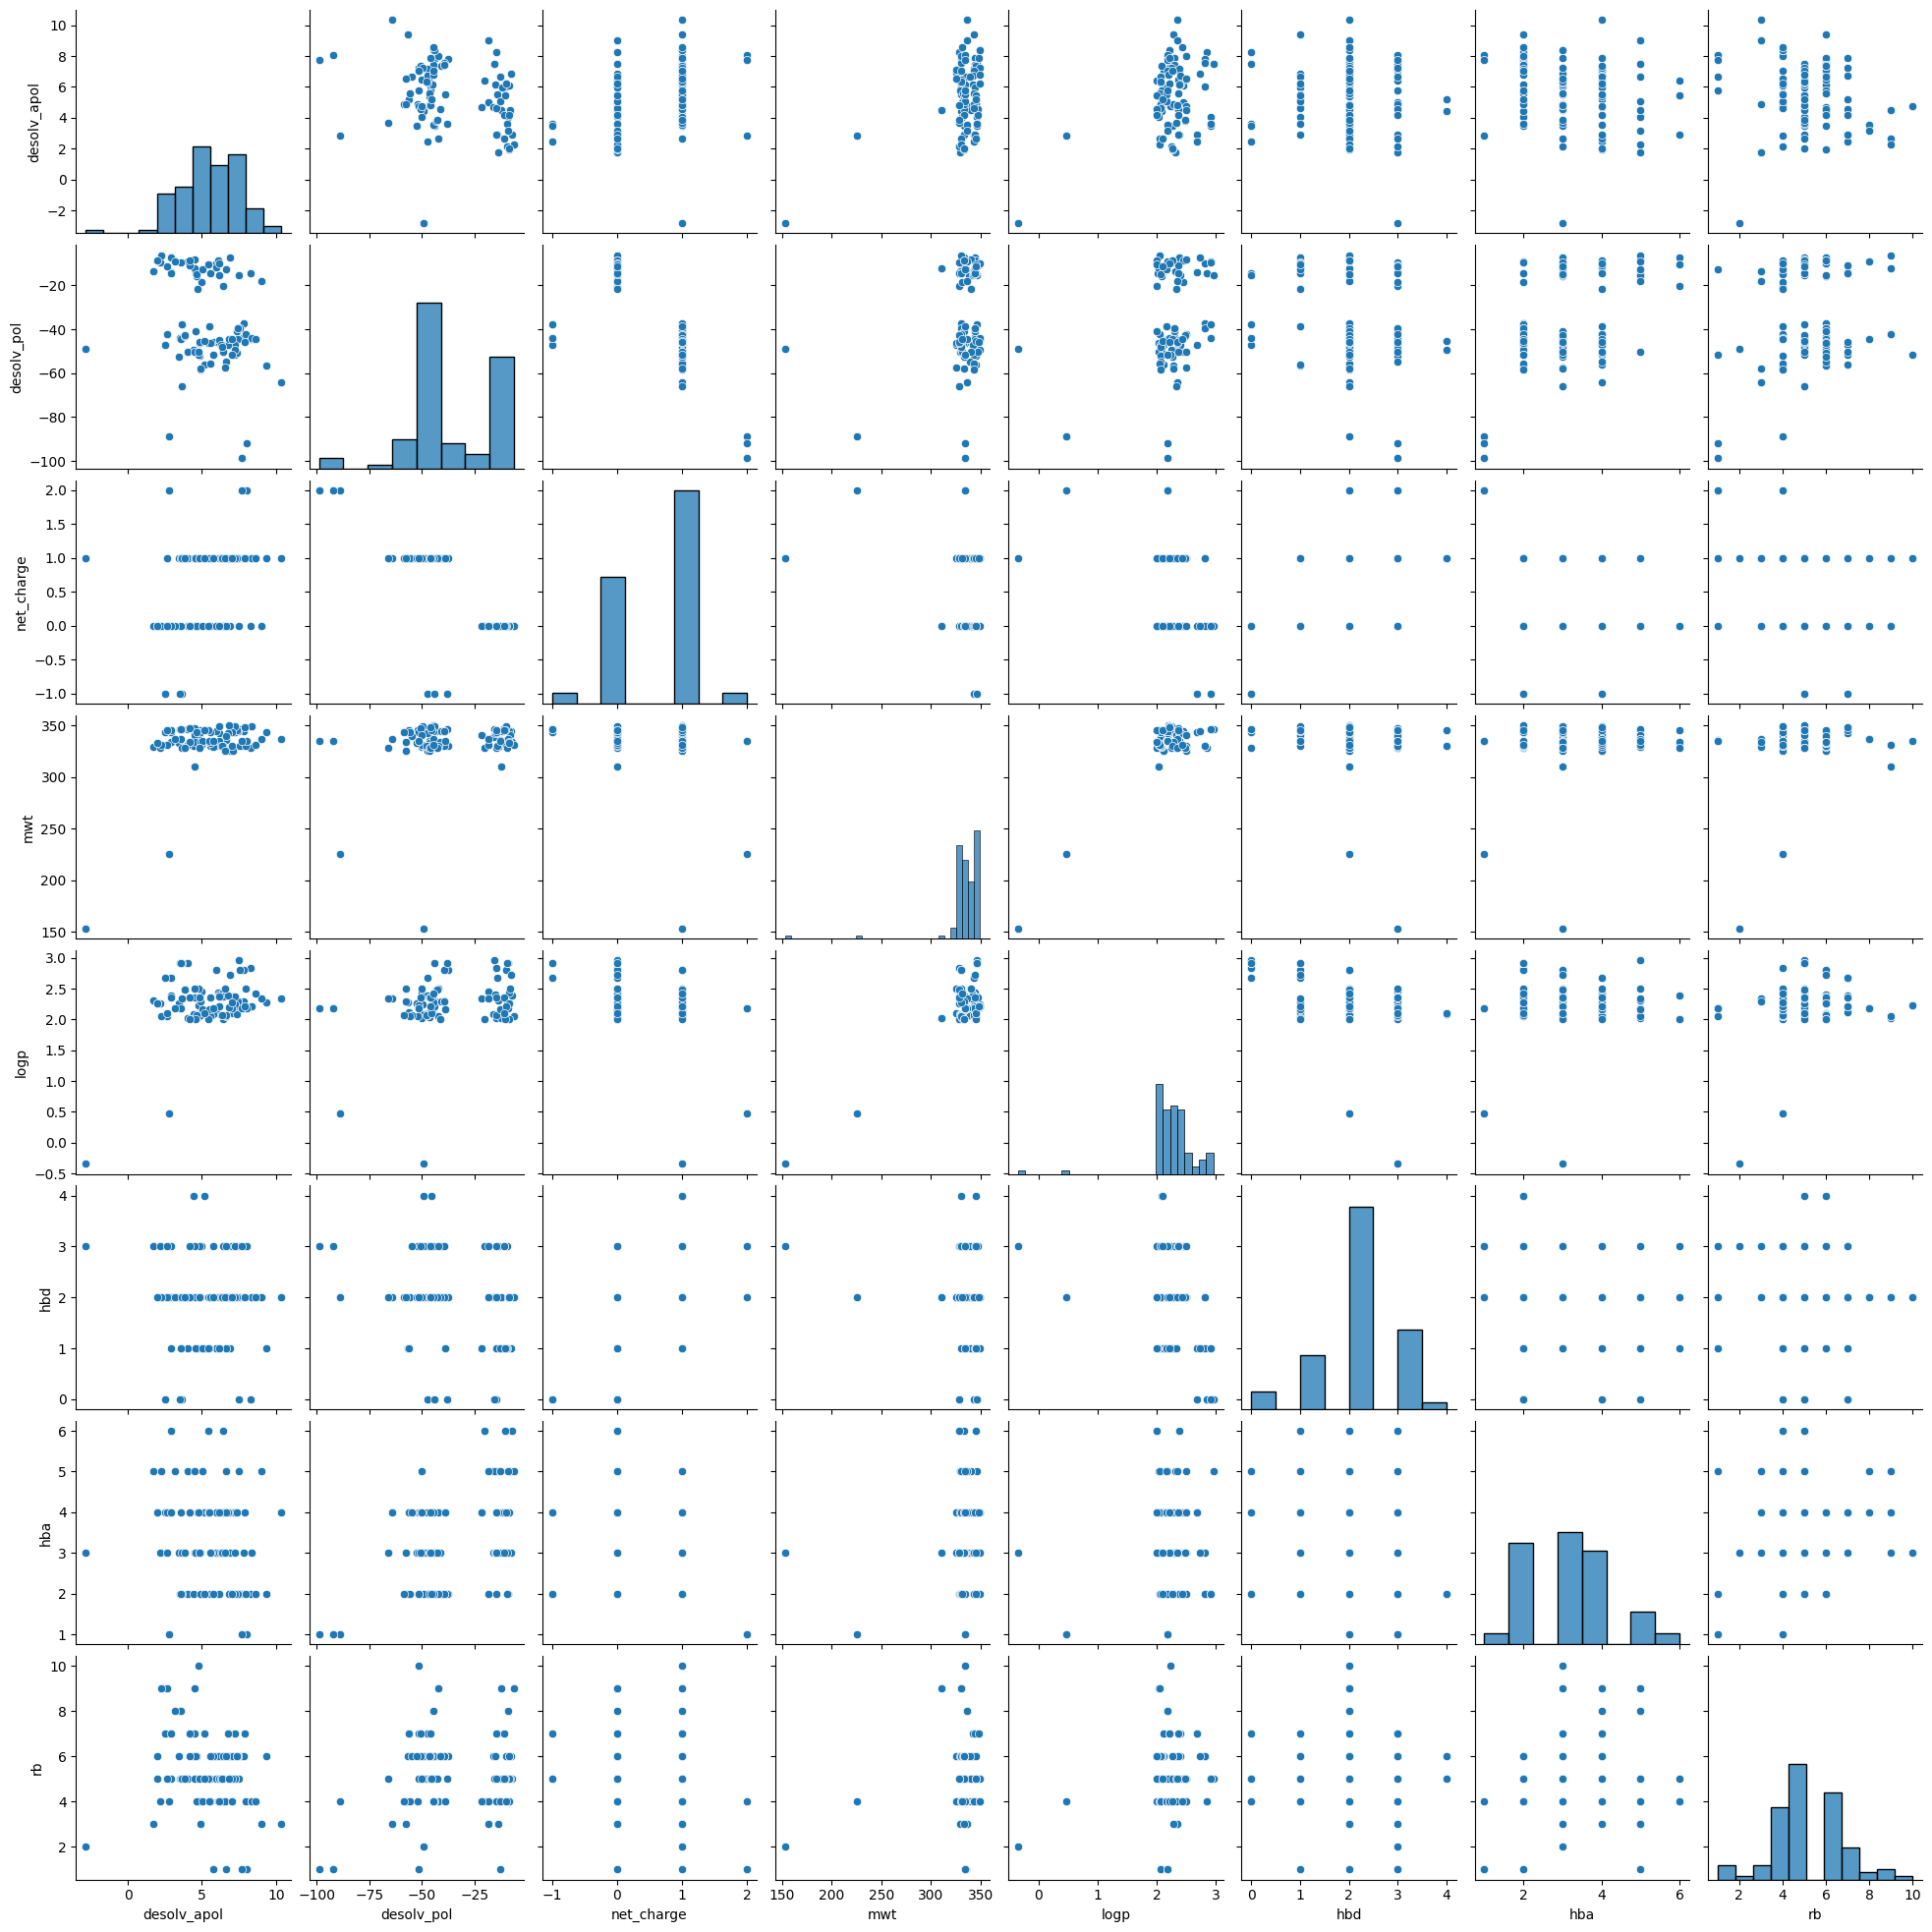

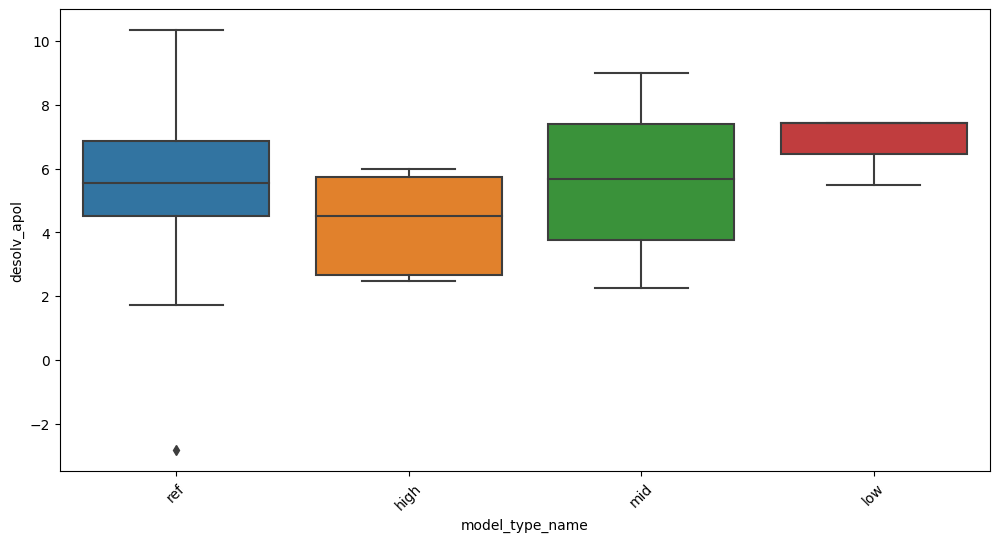

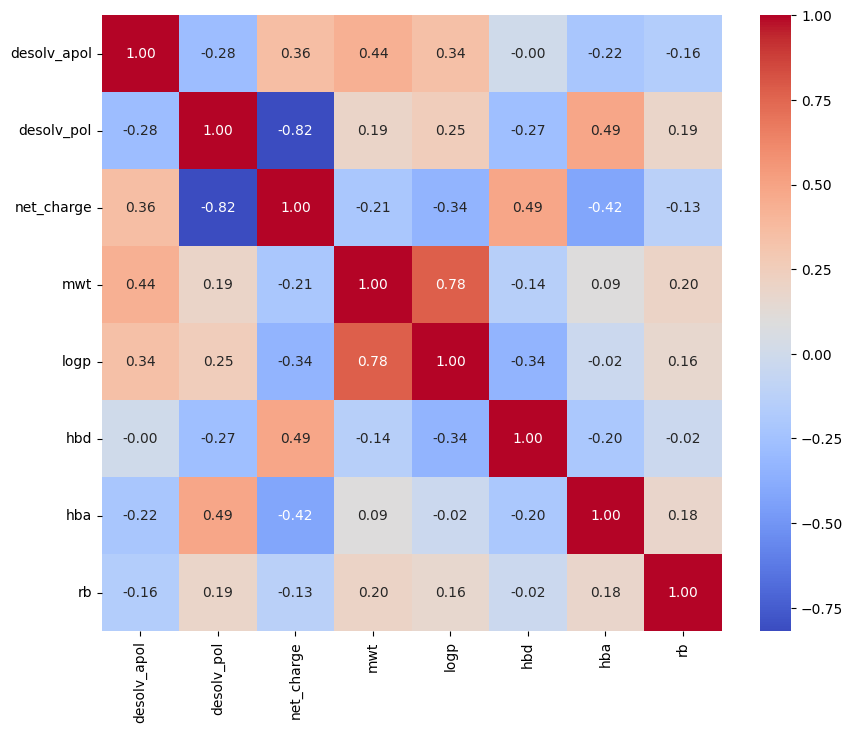

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df

# Pairplot to visualize relationships between numerical columns
sns.pairplot(df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']])
plt.show()

# Boxplot to visualize the distribution of model_type_name with numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type_name', y='desolv_apol', data=df)
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap to visualize the correlation between numerical columns
correlation_matrix = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
df.dtypes

prot_id              int64
zinc_id             object
model_type_name     object
desolv_apol        float64
desolv_pol         float64
net_charge           int64
mwt                float64
logp               float64
hbd                  int64
hba                  int64
rb                   int64
smiles              object
dtype: object

In [ ]:
df

,prot_id,zinc_id,model_type_name,desolv_apol,desolv_pol,net_charge,mwt,logp,hbd,hba,rb,smiles
0,471561869,ZINC000663882404,ref,2.93,-7.40,0,333.432,2.388,2,6,5,O[C@H]1[C@@H](CNc2nccnc2OC2CCC2)CCC12CCOCC2
1,471561876,ZINC000663883761,ref,1.74,-13.60,0,329.400,2.315,3,5,3,O=c1cc(NC[C@@H]2CCC3(CCOCC3)[C@@H]2O)c2ncccc2[...
2,471561883,ZINC000663884679,ref,9.37,-56.67,1,343.471,2.276,1,2,6,C[C@H]1CN(C(=O)C2CC2)CC[C@@H]1[NH2+]CCC(=O)N(C...
3,471561890,ZINC000663881716,ref,5.19,-56.36,1,345.534,2.114,1,4,7,CC[C@@H]1CN(S(=O)(=O)C(C)C)CC[C@@H]1[NH2+]CCc1...
4,471561902,ZINC000663883049,ref,6.41,-20.23,0,328.351,2.007,3,6,4,OC[C@]1(F)CCN(c2nc(Nc3ccccc3)c3[nH]cnc3n2)C1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,471562004,ZINC000655974315,ref,4.84,-46.07,1,328.416,2.352,2,3,5,C[NH2+][C@@H]1CCCN(C(=O)N[C@H](Cc2ccccc2)c2ncc...
96,471562009,ZINC000655971773,ref,8.60,-44.53,1,331.460,2.428,2,2,4,CC[C@H]1c2ccccc2CCN1C(=O)NCC[N@@H+]1CCCOCC1
97,471561898,ZINC000666850496,mid,5.18,-45.56,1,345.434,2.100,4,2,5,O=C(NC1CCC2(CC1)CC2(F)F)N[C@@H]1CCC[N@H+](CCCO)C1
98,471561904,ZINC000666850496,high,2.66,-11.18,0,345.434,2.100,3,3,5,O=C(NC1CCC2(CC1)CC2(F)F)N[C@@H]1CCCN(CCCO)C1


In [ ]:
df['pH'] = df['model_type_name']

In [ ]:
df.isna().sum()

prot_id            0
zinc_id            0
model_type_name    0
desolv_apol        0
desolv_pol         0
net_charge         0
mwt                0
logp               0
hbd                0
hba                0
rb                 0
smiles             0
pH                 0
dtype: int64

In [ ]:
df.dtypes

prot_id              int64
zinc_id             object
model_type_name     object
desolv_apol        float64
desolv_pol         float64
net_charge           int64
mwt                float64
logp               float64
hbd                  int64
hba                  int64
rb                   int64
smiles              object
pH                  object
dtype: object

In [ ]:
df['pH'].value_counts()

ref     74
mid     18
high     5
low      3
Name: pH, dtype: int64

#Machine Learning

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         2
         mid       0.00      0.00      0.00         3
         ref       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.25      0.33      0.29        20
weighted avg       0.56      0.75      0.64        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Machine Learning 2.0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with adjusted class weights
clf_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# AdaBoost with Random Forest base estimator
clf_adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), random_state=42)
clf_adaboost.fit(X_train, y_train)
y_pred_adaboost = clf_adaboost.predict(X_test)

# Gradient Boosting
clf_gradientboost = GradientBoostingClassifier(random_state=42)
clf_gradientboost.fit(X_train, y_train)
y_pred_gradientboost = clf_gradientboost.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, zero_division=1)

# Evaluate AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost, zero_division=1)

# Evaluate Gradient Boosting
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
classification_rep_gradientboost = classification_report(y_test, y_pred_gradientboost, zero_division=1)

# Print results
print("Random Forest:")
print(f'Accuracy: {accuracy_rf}')
print(f'Classification Report:\n{classification_rep_rf}\n')

print("AdaBoost with Random Forest Base Estimator:")
print(f'Accuracy: {accuracy_adaboost}')
print(f'Classification Report:\n{classification_rep_adaboost}\n')

print("Gradient Boosting:")
print(f'Accuracy: {accuracy_gradientboost}')
print(f'Classification Report:\n{classification_rep_gradientboost}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.00      0.00         2
         mid       1.00      0.00      0.00         3
         ref       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.92      0.33      0.29        20
weighted avg       0.81      0.75      0.64        20


AdaBoost with Random Forest Base Estimator:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.00      0.00         2
         mid       1.00      0.00      0.00         3
         ref       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.92      0.33      0.29        20
weighted avg       0.81      0.75      0.64        20


Gradient Boosting:
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Separate features (X) and target variable (y)
X = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate Best Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Gradient Boosting Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Best Gradient Boosting Model
best_gb_model = grid_search_gb.best_estimator_

# Evaluate Best Gradient Boosting Model
y_pred_gb = best_gb_model.predict(X_test)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(df['pH'].unique()), random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print Results
print("Best Random Forest Model:")
print(f'Classification Report:\n{classification_rep_rf}\n')

print("Best Gradient Boosting Model:")
print(f'Classification Report:\n{classification_rep_gb}\n')

print("XGBoost Model:")
print(f'Classification Report:\n{classification_rep_xgb}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pre

ValueError: ignored

#Imbalanced

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your data
# Assuming your data is in a DataFrame called 'df'
# and the target column is called 'pH'

# Separate features (X) and target variable (y)
X = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with class weights
class_weights = dict(Counter(y_train))
total_samples = sum(class_weights.values())
class_weights = {cls: total_samples / count for cls, count in class_weights.items()}

clf = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         2
         mid       0.00      0.00      0.00         3
         ref       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.25      0.33      0.29        20
weighted avg       0.56      0.75      0.64        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Understanding the Data

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.67      0.67      0.67         3
         mid       0.14      0.06      0.08        18
         ref       0.76      0.92      0.83        74

    accuracy                           0.71       100
   macro avg       0.39      0.41      0.39       100
weighted avg       0.60      0.71      0.65       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


Accuracy on Test Set: 0.75
Classification Report on Test Set:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         2
         mid       0.00      0.00      0.00         3
         ref       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.25      0.33      0.29        20
weighted avg       0.56      0.75      0.64        20



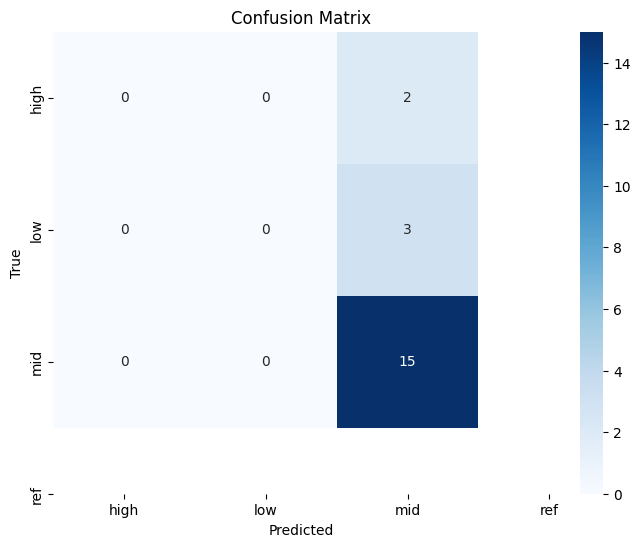

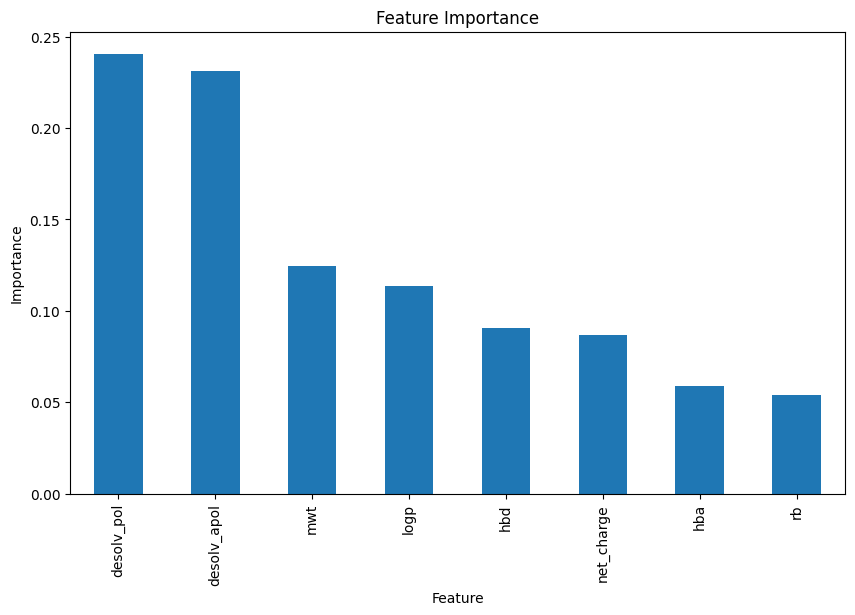

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# Assuming your data is in a DataFrame called 'df'
# and the target column is called 'pH'

# Separate features (X) and target variable (y)
X = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with class weights
class_weights = dict(Counter(y_train))
total_samples = sum(class_weights.values())
class_weights = {cls: total_samples / count for cls, count in class_weights.items()}

clf = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(clf, X, y, cv=cv)

# Evaluate the model using cross-validated predictions
print("Cross-Validated Classification Report:")
print(classification_report(y, y_pred_cv))

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'\nAccuracy on Test Set: {accuracy}')
print(f'Classification Report on Test Set:\n{classification_rep}')

# Confusion Matrix and Error Analysis
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [ ]:
pip install "dandi>=0.13.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.0/332.0 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

#Updated Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load your large dataset
# Assuming your data is in a DataFrame called 'df'
# and the target column is called 'pH'

# Separate features (X) and target variable (y)
X = df[['desolv_apol', 'desolv_pol', 'net_charge', 'mwt', 'logp', 'hbd', 'hba', 'rb']]
y = df['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Create a stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply SMOTE with default n_neighbors
smote = SMOTE(random_state=42)

# Apply SMOTE and fit the RandomizedSearchCV
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=10, scoring=make_scorer(accuracy_score),
    n_jobs=-1, cv=cv, random_state=42, verbose=2
)
random_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'\nAccuracy on Test Set: {accuracy}')
print(f'Classification Report on Test Set:\n{classification_rep}')


ValueError: ignored